In [1]:
from tensorflow.keras.layers import Input, Conv2D, SeparableConv2D
from tensorflow.keras.layers import Add, Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras.layers import ReLU, MaxPool2D, GlobalAvgPool2D, LeakyReLU, AveragePooling2D
from tensorflow.keras import Model, layers
from tensorflow.keras.utils import plot_model

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential, save_model, load_model
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
import time
import matplotlib.pyplot as plt
import datetime
import cv2
import os
import tensorflow as tf
import tensorflow.keras
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

from pathlib import Path
from tensorflow.keras.utils import to_categorical
from collections import Counter
from plotly.subplots import make_subplots
from tensorflow.keras.layers.experimental import preprocessing as ps
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle
import glob
print('tf version', tf.__version__)
print('keras version', tf.keras.__version__)
print('gpu is ','available' if tf.config.list_physical_devices('GPU') else 'not available')

tf version 2.8.0
keras version 2.8.0
gpu is  available


## Extract Data

In [2]:
file = open('X_train_128.pkl', 'rb')
X_train = pickle.load(file)

file = open('y_train_128.pkl', 'rb')
y_train = pickle.load(file)

file = open('X_test_128.pkl', 'rb')
X_test = pickle.load(file)

file = open('y_test_128.pkl', 'rb')
y_test = pickle.load(file)

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11774, 128, 128, 3)
(11774, 49)
(2940, 128, 128, 3)
(2940, 49)


## Functional Architecture

In [4]:
def conv_layer(x, filters, kernel_size, strides=1):
    x = Conv2D(filters=filters,
               kernel_size=kernel_size, 
               strides=strides,
               padding='same',
               use_bias=False)(x)
    x = BatchNormalization()(x)
    return x

In [5]:
def bslr(x):
    x = conv_layer(x, filters=32, kernel_size=3, strides=2)
    x = ReLU()(x)
    x = conv_layer(x, filters=49, kernel_size=3, strides=2)
    x = ReLU()(x)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    
    x = conv_layer(x, filters=128, kernel_size=3, strides=2)
    x = ReLU()(x)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    
    x = conv_layer(x, filters=256, kernel_size=3, strides=2)
    x = ReLU()(x)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    
    x = conv_layer(x, filters=512, kernel_size=3, strides=2)
    x = ReLU()(x)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    
    x = conv_layer(x, filters=728, kernel_size=3, strides=2)
    x = ReLU()(x)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    
    x = conv_layer(x, filters=1024, kernel_size=3, strides=2)
    x = ReLU()(x)
    x = conv_layer(x, filters=1024, kernel_size=3, strides=2)
    x = ReLU()(x)
    x = conv_layer(x, filters=1024, kernel_size=3, strides=2)
    x = ReLU()(x)
    
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    
    x = conv_layer(x, filters=728, kernel_size=3, strides=2)
    x = LeakyReLU()(x)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    
    x = conv_layer(x, filters=512, kernel_size=3, strides=2)
    x = LeakyReLU()(x)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    
    x = Flatten()(x)
    x = Dense(256, activation=LeakyReLU())(x)
    x = Dense(128, activation=LeakyReLU())(x)
    x = Dense(64, activation=LeakyReLU())(x)
    x = Dense(49, activation='softmax')(x)
    
    return x

In [8]:
input = Input(shape=[128, 128, 3])

x = bslr(input)

base_model = Model(input, x)

## Sequential Architecture

### Our Architecture

In [6]:
# Experiment 1 92%
model = Sequential()
model.add(Conv2D(49,(3,3),activation='relu', input_shape=(128,128,3)))
model.add(AveragePooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(AveragePooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(AveragePooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu'))b
model.add(AveragePooling2D((2,2)))
model.add(Conv2D(768,(3,3),activation='relu'))
model.add(AveragePooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(768,activation=LeakyReLU()))
model.add(Dense(512,activation=LeakyReLU()))
model.add(Dense(256,activation=LeakyReLU()))
model.add(Dense(128,activation=LeakyReLU()))
model.add(Dense(49,activation='softmax'))

### Recognition Bangla Sign Language using Convolutional Neural Network

In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(32,(5,5),activation='relu', input_shape=(128,128,3)))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D((2,2)))

model_2.add(Conv2D(64,(5,5),activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D((2,2)))

model_2.add(Conv2D(128,(3,3),activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D((2,2)))

model_2.add(Conv2D(256,(3,3),activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D((2,2)))

model_2.add(Conv2D(384,(3,3),activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D((2,2)))

model_2.add(Conv2D(512,(3,3),activation='relu'))
model_2.add(BatchNormalization())

model_2.GlobalAvgPool2D()
model_2.add(Dense(84))
model_2.add(Dropout(0.5))
model_2.add(Dense(49, activation='softmax'))

In [9]:
num_of_class = 49
epoch = 100

# model = Sequential()
# model.add(base_model)

model_2.compile(loss ='categorical_crossentropy', optimizer ='rmsprop', metrics =['accuracy'])

In [7]:
# #optimizer = tf.keras.optimizers.RMSprop(learning_rate=2e-5)

# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Model Preparation

In [10]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 49)      1372      
                                                                 
 average_pooling2d (AverageP  (None, 63, 63, 49)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       56576     
                                                                 
 average_pooling2d_1 (Averag  (None, 30, 30, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 256)       295168    
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 256)      0

In [11]:
H = model_2.fit(
    x=X_train,
    y=y_train,
    batch_size=58,
    epochs=epoch,
    validation_data=(X_test, y_test))

Epoch 1/100
203/203 [==============================] - 24s 92ms/step - loss: 3.3321 - accuracy: 0.1346 - val_loss: 3.4551 - val_accuracy: 0.0959
Epoch 2/100
203/203 [==============================] - 17s 82ms/step - loss: 1.9951 - accuracy: 0.4147 - val_loss: 2.4315 - val_accuracy: 0.3452
Epoch 3/100
203/203 [==============================] - 17s 82ms/step - loss: 1.2424 - accuracy: 0.6148 - val_loss: 1.3207 - val_accuracy: 0.5895
Epoch 4/100
203/203 [==============================] - 17s 82ms/step - loss: 0.8859 - accuracy: 0.7168 - val_loss: 1.9355 - val_accuracy: 0.4650
Epoch 5/100
203/203 [==============================] - 17s 82ms/step - loss: 0.7155 - accuracy: 0.7697 - val_loss: 0.7894 - val_accuracy: 0.7554
Epoch 6/100
203/203 [==============================] - 17s 82ms/step - loss: 0.5914 - accuracy: 0.8019 - val_loss: 0.7564 - val_accuracy: 0.7799
Epoch 7/100
203/203 [==============================] - 17s 82ms/step - loss: 0.5107 - accuracy: 0.8331 - val_loss: 1.1607 - val_ac

## Visualization

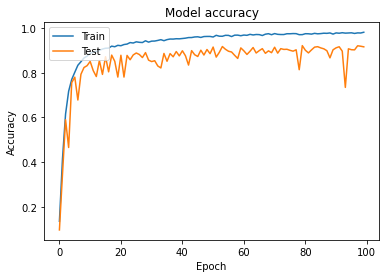

In [12]:
# Plot training & validation accuracy values
fig, ax = plt.subplots(1,1)
plt.plot(H.history["accuracy"])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

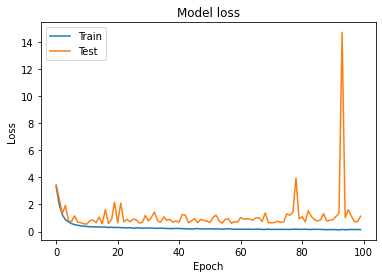

In [13]:
# Plot training & validation loss values
fig, ax = plt.subplots(1,1)
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        60
           1       0.93      0.93      0.93        60
           2       0.92      0.73      0.81        60
           3       0.65      0.88      0.75        60
           4       0.76      0.68      0.72        60
           5       0.86      0.93      0.90        60
           6       0.82      0.93      0.87        60
           7       0.91      0.97      0.94        60
           8       0.96      0.88      0.92        60
           9       0.86      1.00      0.92        60
          10       0.96      0.88      0.92        60
          11       0.98      0.88      0.93        60
          12       0.98      0.98      0.98        60
          13       0.96      0.85      0.90        60
          14       0.95      0.98      0.97        60
          15       0.98      0.95      0.97        60
          16       0.93      0.95      0.94        60
     

Text(249.0, 0.5, 'Predicted')

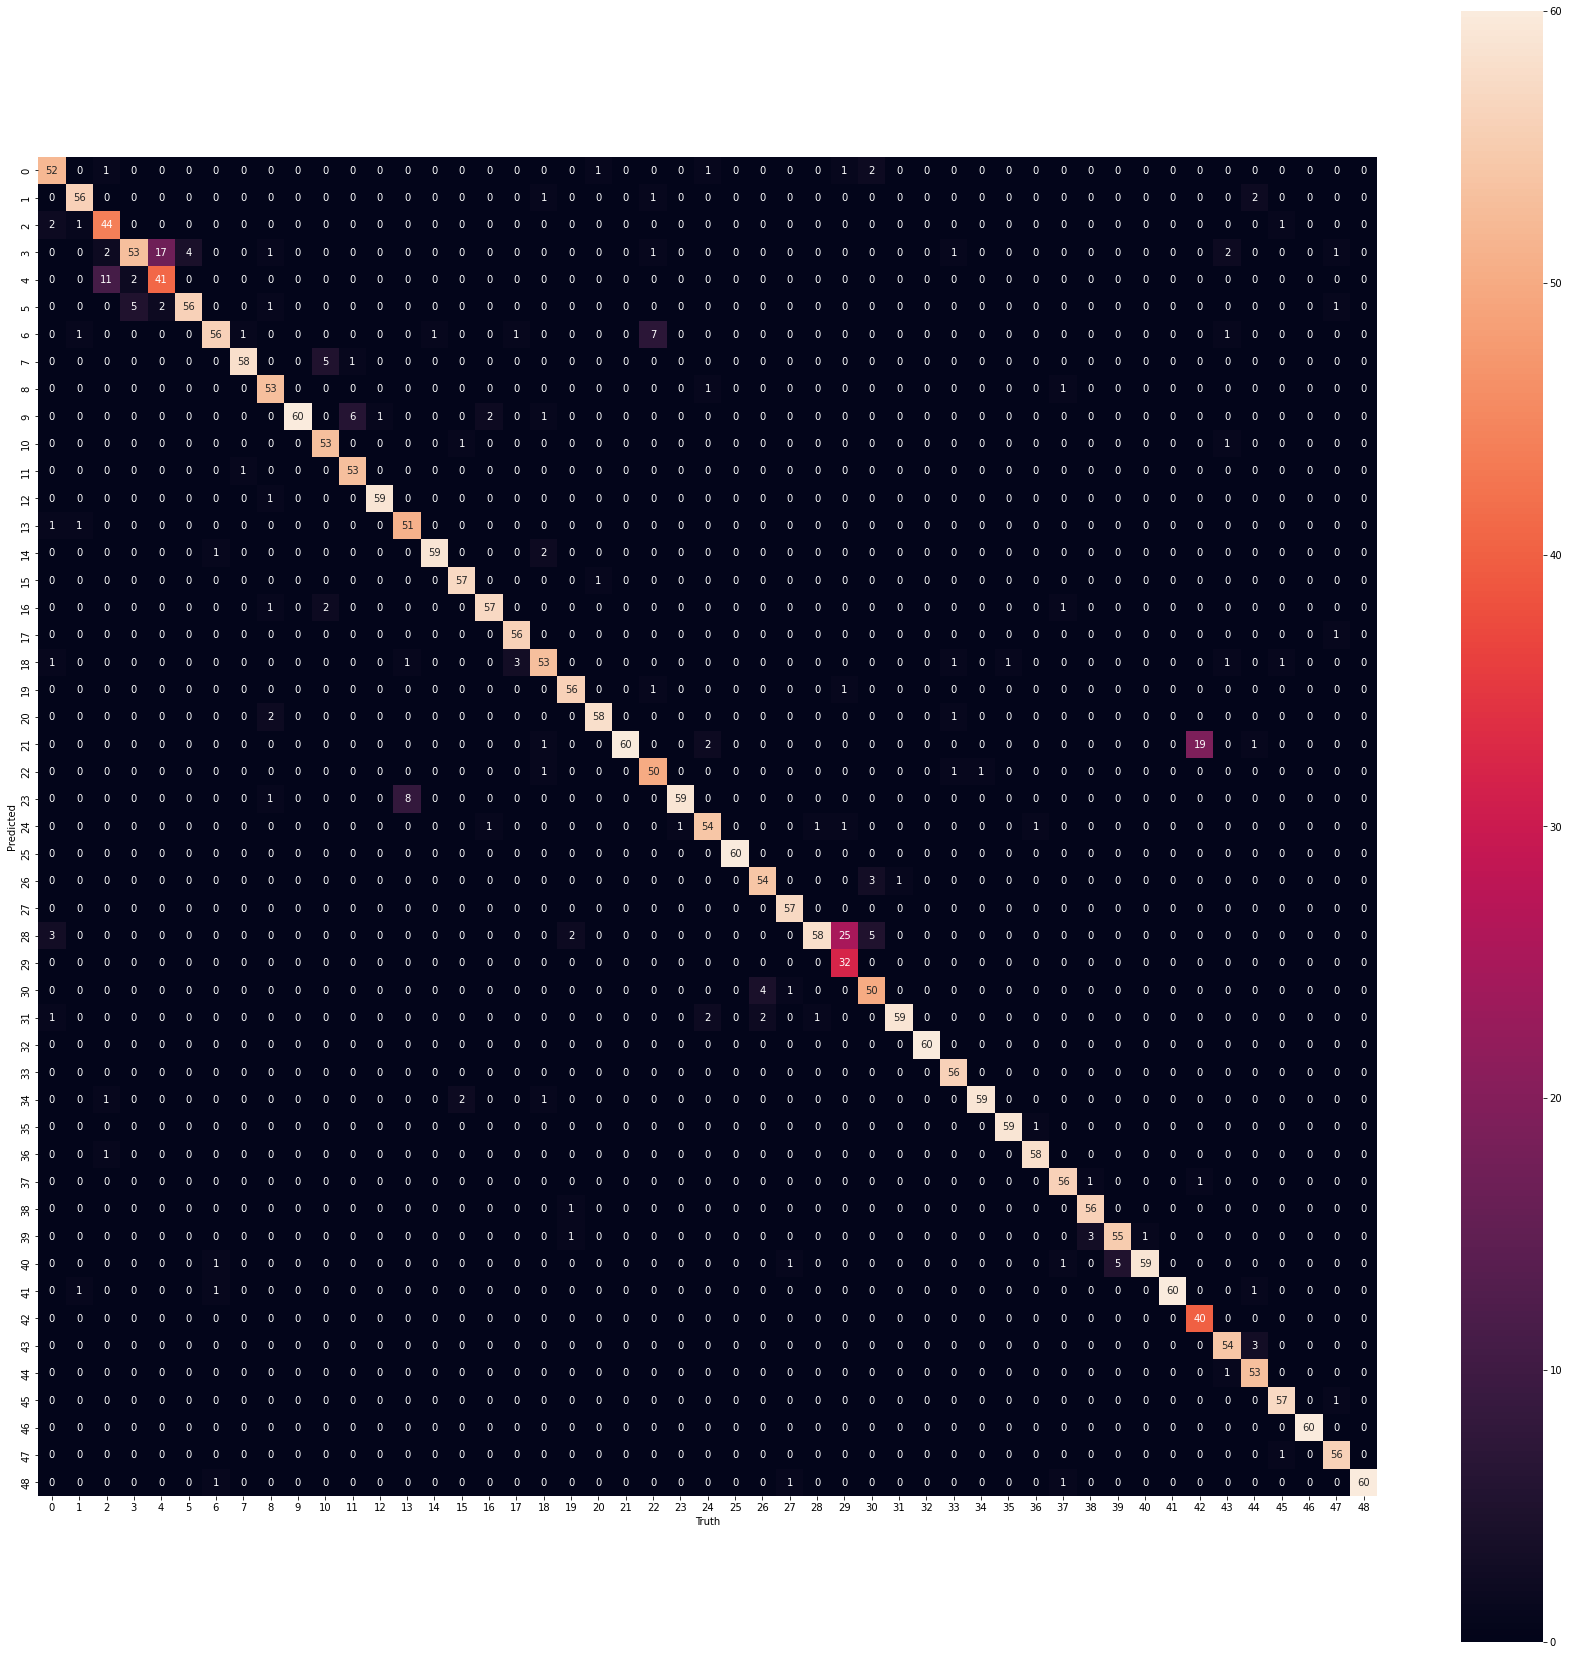

In [14]:
y_pred = np.argmax(model.predict(X_test,batch_size=1), axis=1) 

print('Classification Report')
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]
report = classification_report(y_classes, y_pred)
print(report)

plt.figure(figsize=(30,30))
cm = confusion_matrix(y_classes, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=True, square=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')